In [178]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as smp
import pandas as pd
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
pi = np.pi

# 1

In [179]:
npoint = 100000
M = 10**11
a = 1.5

In [180]:
def initialize(M = 1, R = 1, G = 1):
    rand = np.random.rand(3)
    r = (rand[0]**(-2/3)-1)**(-1/2)
    z = (1-2*rand[1])*r
    x = (r**2 - z**2)**(1/2) * np.cos(2*pi*rand[2])
    y = (r**2 - z**2)**(1/2) * np.sin(2*pi*rand[2])
    
    V_escape = 2**(1/2) * (1+r**2)**(-1/4)
    # generate X_4 and X_5
    rand = np.random.rand(2)
    while rand[1] > (rand[0]**2 *(1-rand[0]**2)**(7/2)):
        rand = np.random.rand(2)
    q = rand[0]
    V = V_escape*q

    # generate three velocity
    rand = np.random.rand(2)
    v_z = (1-2*rand[0]) * V
    v_x = (V**2 - v_z**2)**(1/2) * np.cos(2*pi*rand[1])
    v_y = (V**2 - v_z**2)**(1/2) * np.sin(2*pi*rand[1])

    return np.array([r, x, y, z, V,v_x, v_y, v_z])

out = np.zeros((npoint, 8))
for i in range(npoint):
    out[i] =  initialize()

df = pd.DataFrame(out, columns=['r', "r_x", "r_y", "r_z",'V', 'v_x', 'v_y', 'v_z'])
    




# 2

[]

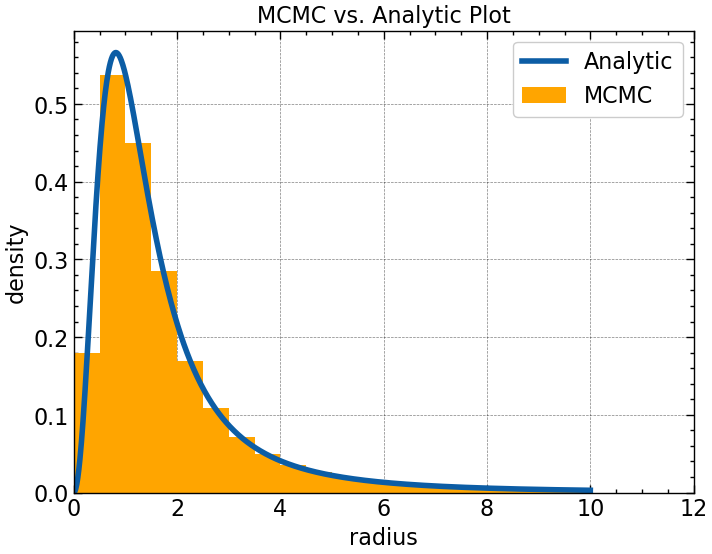

In [181]:
def distribution(r, M = 1, R = 1, G =1):
    rho = (3/4)*pi*M*R**(-3) * (1+(r/R)**2)**(-5/2) 
    return rho * 4 * pi * r**2

# getting the analytic distribution points 
radius = np.linspace(0,10,1000)
dist = distribution(radius)

# normalize the analytic distribution
dt = radius[1]-radius[0]
normalization = (dist).sum()*dt
dist = dist / normalization

# plotting our MCMC data with the analytic expression
plt.plot(radius ,dist, label = 'Analytic', lw=4)
plt.hist(df.loc[:,'r'], range=(0, 10), density=True, bins=20, label = 'MCMC', color = 'orange')
plt.xlim(0, 12)
plt.xlabel('radius')
plt.ylabel('density')
plt.title('MCMC vs. Analytic Plot')
plt.legend()
plt.plot()


# 3

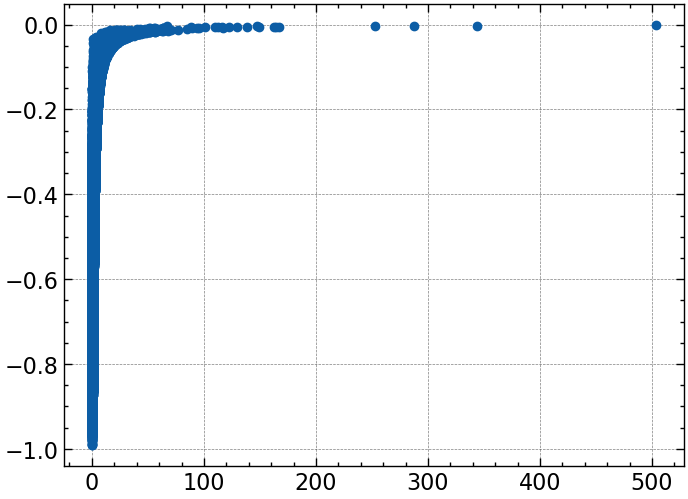

In [182]:
# grabbing radius and velocity magnitiude from dataframe
r = df.loc[:,'r']
v = df.loc[:,'V']

# function that calculate potential energy
def potential(r, M = 1, R = 1, G =1):
    return -G*M*R**(-1)*(1+(r/R)**2)**(-1/2)

p_Energy = potential(r)
k_Energy = 1/2*(v**2)
t_Energy = p_Energy + k_Energy

plt.plot(r, t_Energy, 'o')

